In [3]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import pandas as pd

df = pd.read_csv('data/articles1.csv')

df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   id           50000 non-null  int64  
 2   title        50000 non-null  object 
 3   publication  50000 non-null  object 
 4   author       43694 non-null  object 
 5   date         50000 non-null  object 
 6   year         50000 non-null  float64
 7   month        50000 non-null  float64
 8   url          0 non-null      float64
 9   content      50000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.8+ MB


In [6]:
# corpus = df['title']+df['content']
corpus = df['content'].copy()

In [7]:
corpus.head()

0    WASHINGTON  —   Congressional Republicans have...
1    After the bullet shells get counted, the blood...
2    When Walt Disney’s “Bambi” opened in 1942, cri...
3    Death may be the great equalizer, but it isn’t...
4    SEOUL, South Korea  —   North Korea’s leader, ...
Name: content, dtype: object

In [8]:
corpus.shape

(50000,)

In [9]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

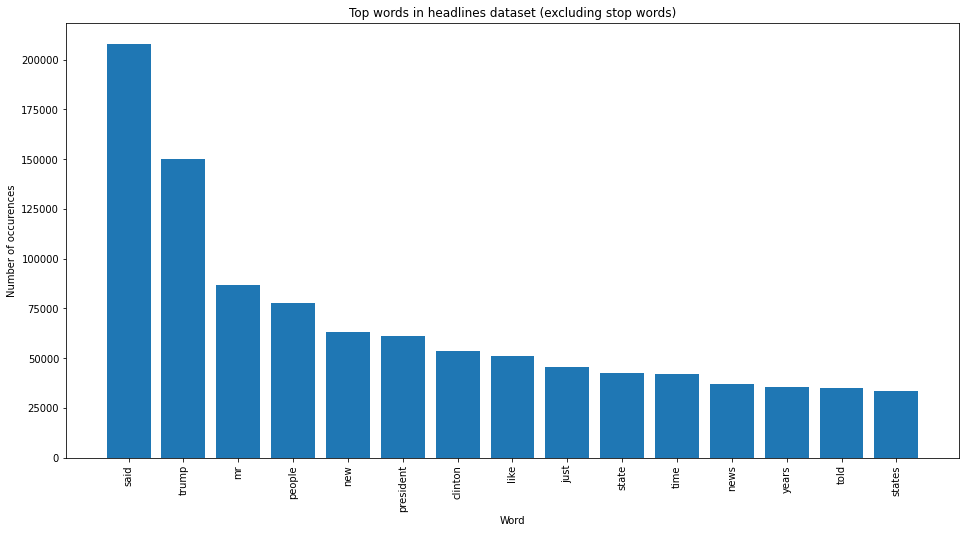

In [10]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=corpus)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
                             stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True)

In [12]:
X = vectorizer.fit_transform(corpus)

In [13]:
print(X[0])

  (0, 154247)	0.01727864041047229
  (0, 10804)	0.03762808777244603
  (0, 50758)	0.029903712448266742
  (0, 73259)	0.05260414236471058
  (0, 47267)	0.04195126306559638
  (0, 33964)	0.03168286462043743
  (0, 127313)	0.04442432132456251
  (0, 23828)	0.031358575295090015
  (0, 119754)	0.04999619802242972
  (0, 162613)	0.02663399496318598
  (0, 137528)	0.02676948243717079
  (0, 120214)	0.01693161262407355
  (0, 6395)	0.0321026454087567
  (0, 120270)	0.025990225284860693
  (0, 33480)	0.03385324725196971
  (0, 88646)	0.03868863376352293
  (0, 127983)	0.034625210610475785
  (0, 136767)	0.03822400785390937
  (0, 119752)	0.03707733867133118
  (0, 56052)	0.04001077346778683
  (0, 52553)	0.026404631313344785
  (0, 87985)	0.045462745371474725
  (0, 131305)	0.030538173829315892
  (0, 76918)	0.02039115023325946
  (0, 73730)	0.020095584876244195
  :	:
  (0, 45171)	0.026314543971942432
  (0, 19615)	0.03355659713245878
  (0, 143126)	0.028172255916753045
  (0, 14095)	0.056070184382046556
  (0, 29113)	0.0

In [15]:
X.shape

(50000, 173899)

In [16]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=20, n_iter=10)

In [17]:
US = lsa.fit_transform(X)

In [18]:
lsa.components_[0]

array([9.11479434e-03, 3.55623489e-02, 1.98707486e-05, ...,
       2.26816057e-06, 2.26816057e-06, 2.26816057e-06])

In [19]:
lsa.components_[0].shape

(173899,)

In [20]:
lsa.components_.shape

(20, 173899)

In [21]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedTerms = sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
    print(f"Topic {i}:")
    for term in sortedTerms:
        print(term[0])
    print(" ")

Topic 0:
trump
said
mr
clinton
president
people
obama
campaign
new
donald
 
Topic 1:
trump
clinton
hillary
campaign
donald
cruz
republican
voters
sanders
presidential
 
Topic 2:
mr
trump
ms
mrs
russia
said
united
administration
china
kushner
 
Topic 3:
clinton
mr
hillary
sanders
mrs
emails
foundation
email
democratic
state
 
Topic 4:
russia
comey
russian
fbi
president
intelligence
obama
investigation
syria
security
 
Topic 5:
police
trump
officers
comey
officer
fbi
investigation
breitbart
said
man
 
Topic 6:
comey
house
fbi
health
obamacare
senate
ryan
republicans
care
court
 
Topic 7:
cruz
percent
police
rubio
court
texas
state
voters
republican
senate
 
Topic 8:
breitbart
trump
percent
immigration
news
border
texas
illegal
mexico
immigrants
 
Topic 9:
korea
north
percent
china
comey
korean
trump
south
missile
police
 
Topic 10:
cruz
breitbart
news
rubio
korea
north
mr
ted
comey
twitter
 
Topic 11:
korea
north
obama
korean
china
police
nuclear
court
president
missile
 
Topic 12:
ryan


In [22]:
Sigma = lsa.singular_values_
Sigma.shape

(20,)

[Text(0.5, 0, 'Topic'),
 Text(0, 0.5, 'Importance of topic'),
 Text(0.5, 1.0, 'Topic x Topic matrix')]

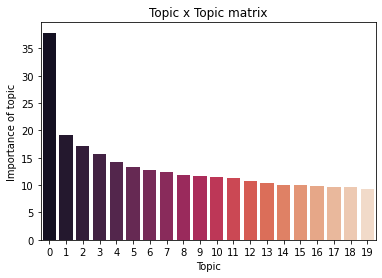

In [23]:
import seaborn as sns

figure = sns.barplot(x=list(range(len(Sigma))), y = Sigma, palette="rocket")
figure.set(xlabel='Topic', ylabel='Importance of topic', title='Topic x Topic matrix')

In [24]:
figure.figure.savefig("importance-of-topic.png", dpi=500)

In [25]:
U = US / Sigma
U.shape

(50000, 20)

In [26]:
search_cache = np.argsort(-U, axis=0) # sort every column

def search(n_documents, topic_id):
    for rank in range(n_documents):
        print(f"Document {search_cache[rank, topic_id]}")

In [27]:
search(3, 0)

Document 7437
Document 38307
Document 38319


In [28]:
for president in ['Trump', 'Obama', 'Clinton']:
    print(president in corpus[7437])

True
True
True


In [29]:
corpus[7437]

'Our coverage of the Trump transition continues. Read Friday’s briefing »   Donald J. Trump’s busy day in Washington has come to an end, with smiles all around and the Dow Jones industrial average at a record high, but with protests continuing in the city’s streets. Mr. Trump had intended to stay the night in Washington, but changed his mind and returned Thursday to Trump Tower in Manhattan. Check back with us as we monitor every step of the Trump transition. Steve Bannon, the conservative provocateur and Mr. Trump’s campaign chief, is now a leading candidate to become White House chief of staff, but he’d have to beat out another campaign veteran in the running, Reince Priebus, the chairman of the Republican National Committee, according to two people with knowledge of the discussions. Mr. Bannon, the executive chairman of the conservative website Breitbart News, who took a leave to help manage the final weeks of Mr. Trump’s campaign, is well liked among Mr. Trump’s circle of overlappi